PRUNING: Removal of some parts pre and post prunning
    

In [14]:
import  numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier


In [15]:
from sklearn.datasets import load_breast_cancer
data= load_breast_cancer()

In [16]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [17]:
X, y = load_breast_cancer(return_X_y = True)

In [18]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size = 0.2,random_state = 22)

In [19]:
df = pd.DataFrame(data=data.data, columns = data.feature_names)

In [20]:
clf =DecisionTreeClassifier(random_state = 22)
clf.fit(X_train,y_train)
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)
print(accuracy_score(y_train,y_train_pred))
print(accuracy_score(y_test,y_test_pred))

1.0
0.9385964912280702


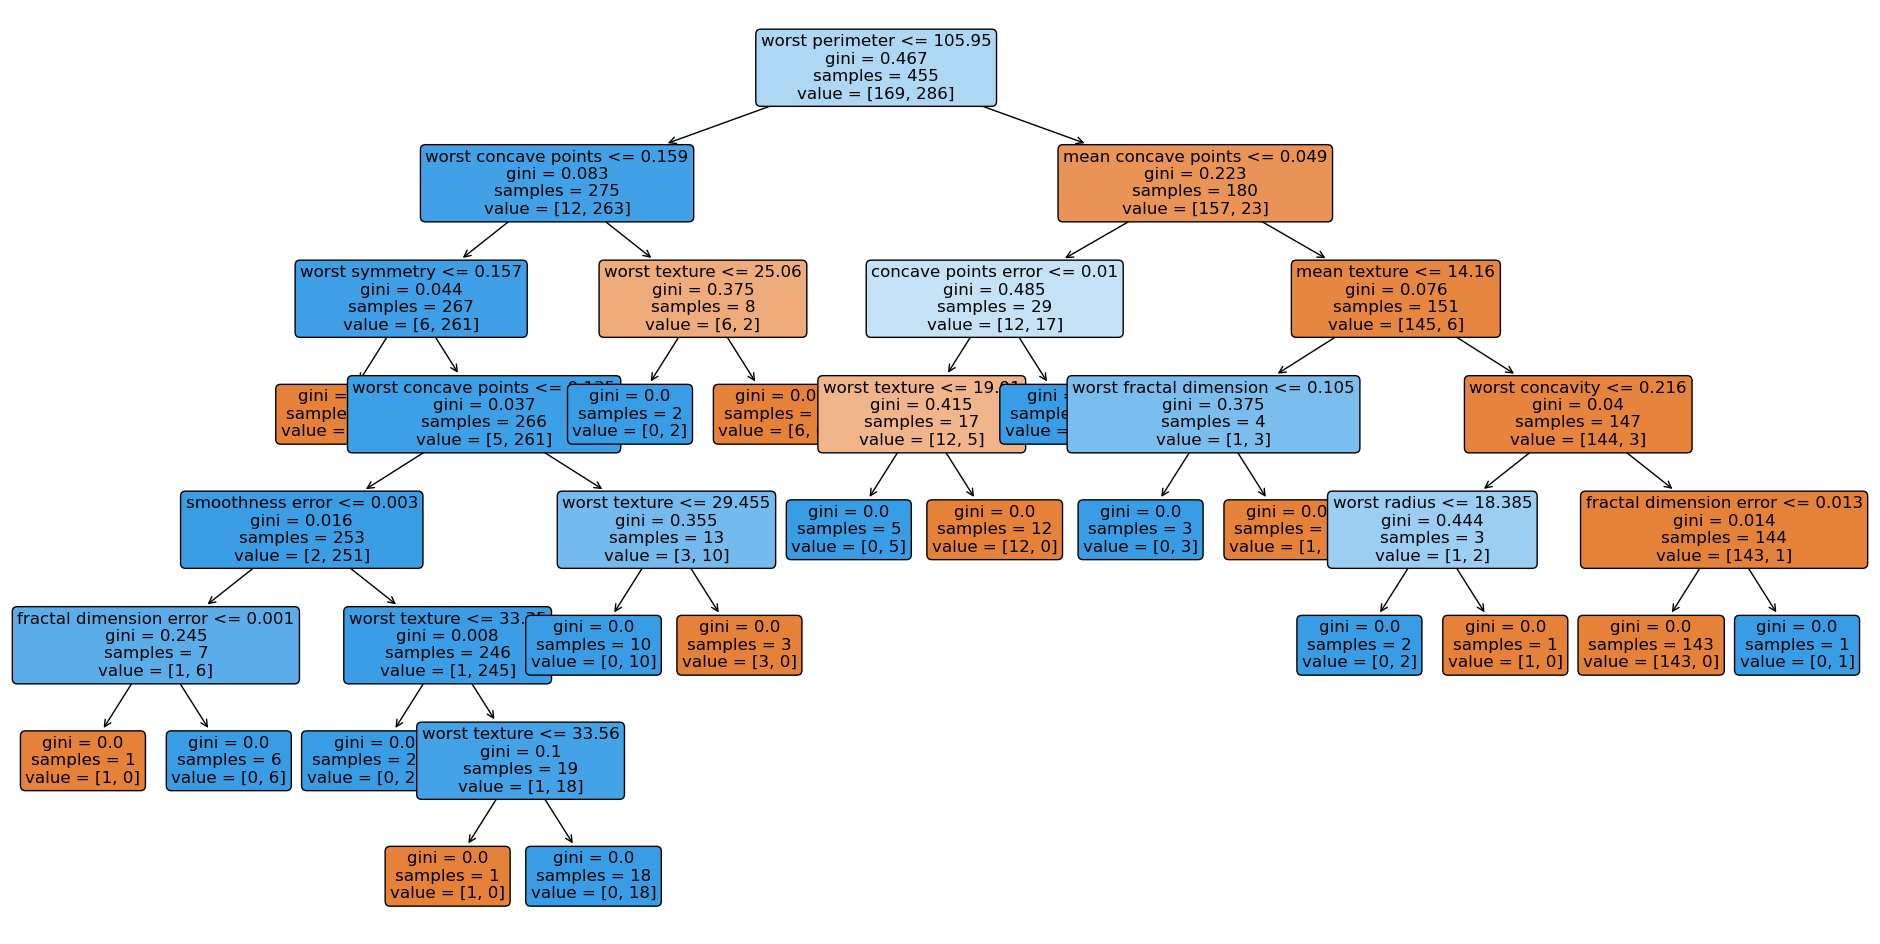

In [21]:
from sklearn import tree
plt.figure(figsize=(24,12))
tree.plot_tree(clf,feature_names = df.columns,filled = True,rounded =True,fontsize = 12)
plt.show()

In [22]:
path = clf.cost_complexity_pruning_path(X_train,y_train)

In [24]:
ccp_alphas,imp = path.ccp_alphas,path.impurities

In [25]:
print("list  of values :", ccp_alphas)
print("Impurities in Decision Tree:",imp)

list  of values : [0.         0.00218043 0.0029304  0.0032967  0.00436508 0.00562221
 0.00568642 0.00659341 0.00911127 0.0154604  0.01807119 0.03193424
 0.32831251]
Impurities in Decision Tree: [0.         0.00872171 0.01165212 0.01494882 0.0193139  0.02493611
 0.04199536 0.04858877 0.05770003 0.08862084 0.10669203 0.13862626
 0.46693878]


In [30]:
clfs = []
for ccp_al in ccp_alphas:
    clf = DecisionTreeClassifier(random_state = 0,ccp_alpha =ccp_al)
    clf.fit(X_train,y_train)
    clfs.append(clf)
    print("last node in decision tree is {} and ccp alpha for last node {}".format(clfs[-1].tree_.node_count,ccp_alphas[-1]))

last node in decision tree is 37 and ccp alpha for last node 0.3283125128839415
last node in decision tree is 29 and ccp alpha for last node 0.3283125128839415
last node in decision tree is 27 and ccp alpha for last node 0.3283125128839415
last node in decision tree is 25 and ccp alpha for last node 0.3283125128839415
last node in decision tree is 23 and ccp alpha for last node 0.3283125128839415
last node in decision tree is 21 and ccp alpha for last node 0.3283125128839415
last node in decision tree is 15 and ccp alpha for last node 0.3283125128839415
last node in decision tree is 13 and ccp alpha for last node 0.3283125128839415
last node in decision tree is 11 and ccp alpha for last node 0.3283125128839415
last node in decision tree is 7 and ccp alpha for last node 0.3283125128839415
last node in decision tree is 5 and ccp alpha for last node 0.3283125128839415
last node in decision tree is 3 and ccp alpha for last node 0.3283125128839415
last node in decision tree is 1 and ccp alp

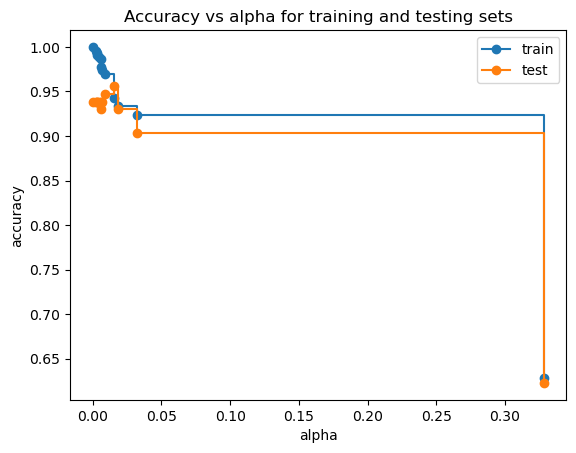

In [33]:
train_scores = [clf.score(X_train,y_train)for clf in clfs]
test_scores = [clf.score(X_test,y_test)for clf in clfs]

fig,ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o',label = "train",drawstyle = 'steps-post')
ax.plot(ccp_alphas, test_scores, marker='o',label = "test",drawstyle = 'steps-post')
ax.legend()
plt.show()

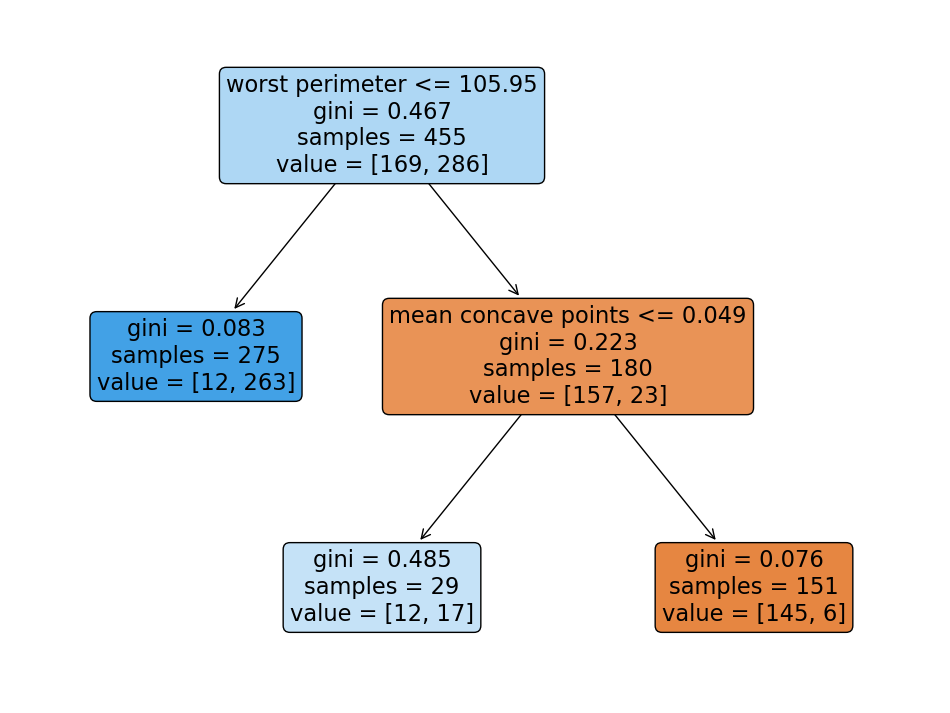

In [34]:
alpha = 0.02
clf = DecisionTreeClassifier(random_state = 0,ccp_alpha = 0.02)
clf.fit(X_train,y_train)
plt.figure(figsize = (12,9))
tree.plot_tree(clf,rounded = True,filled = True,feature_names = df.columns)
plt.show()

In [36]:
accuracy_score(y_test,clf.predict(X_test))

0.9298245614035088

In [39]:
from sklearn.model_selection import GridSearchCV
grid_param ={"criterion":["gini","entropy"],
             "splitter":["best","random"],
            "max_depth":range(2,50,1),
            "min_samples_leaf":range(1,15,1),
            "min_samples_split":range(2,20,1)}
grid_search = GridSearchCV(estimator=clf,param_grid=grid_param,cv = 5,n_jobs=-1)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(ccp_alpha=0.02, random_state=0),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 50),
                         'min_samples_leaf': range(1, 15),
                         'min_samples_split': range(2, 20),
                         'splitter': ['best', 'random']})

In [40]:
print(grid_search.best_params_)

{'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 9, 'min_samples_split': 2, 'splitter': 'best'}


In [42]:
df = pd.read_csv('Advertising.csv')

In [44]:
X=df.iloc[:,2:4].values
y = df.iloc[:,-1].values

In [45]:
y.shape

(200,)

In [46]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)

In [48]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [49]:
X_train =sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [51]:
np.sqrt(X_train.shape[0])

11.832159566199232

In [52]:
k = 12

In [54]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = k)

In [55]:
knn.fit(X_train,y_train)

ValueError: Unknown label type: 'continuous'